In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [5]:
df.shape

(150, 6)

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
df.groupby("Species")[["SepalLengthCm","SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].mean()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

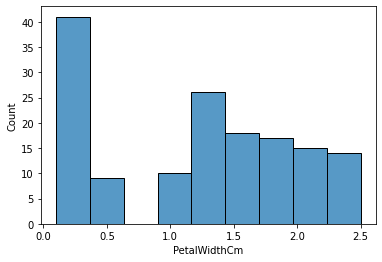

In [25]:
sb.histplot(data=df, x="PetalWidthCm")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

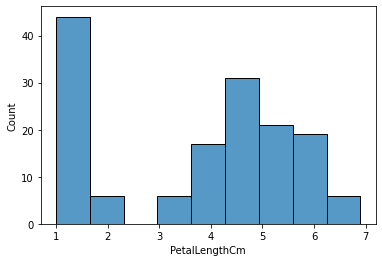

In [26]:
sb.histplot(data=df, x="PetalLengthCm")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

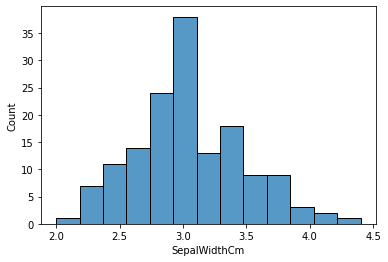

In [21]:
sb.histplot(data=df, x="SepalWidthCm")

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

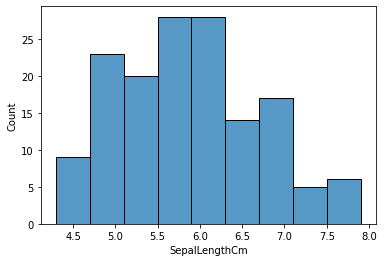

In [22]:
sb.histplot(data=df, x="SepalLengthCm")

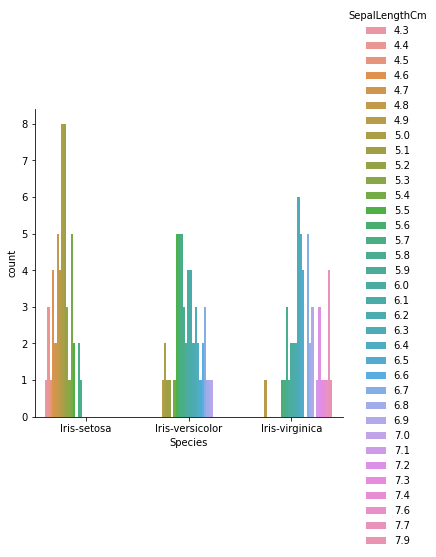

In [8]:
plot = sb.catplot(x ="Species", hue ="SepalLengthCm",kind ="count", data = df)
plot

<AxesSubplot:xlabel='PetalWidthCm'>

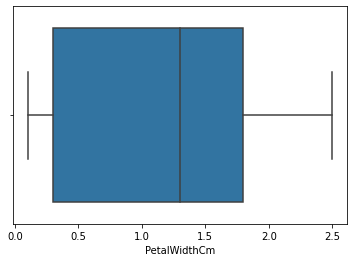

In [18]:
sb.boxplot(x=df['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm'>

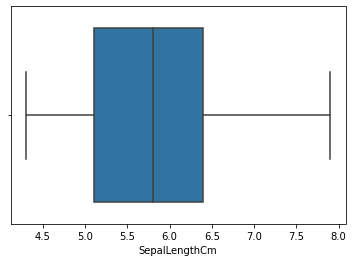

In [14]:
sb.boxplot(x=df['SepalLengthCm'])

<AxesSubplot:xlabel='PetalLengthCm'>

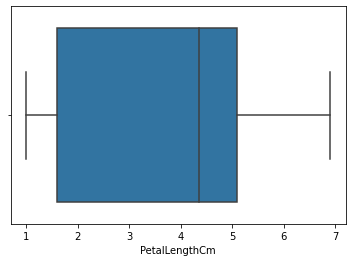

In [16]:
sb.boxplot(x=df['PetalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

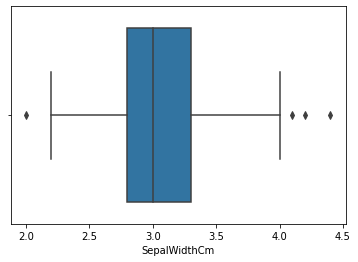

In [17]:
sb.boxplot(x=df['SepalWidthCm'])

In [9]:
Q1=df['SepalWidthCm'].quantile(0.25)
Q3=df['SepalWidthCm'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df[(df['SepalWidthCm']<lower_limit)|(df['SepalWidthCm']>upper_limit)]

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor

In [10]:
df_without_outliers=df[(df['SepalWidthCm']>lower_limit)&(df['SepalWidthCm']<upper_limit)]
df_without_outliers

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[146 rows x 6 columns]

<AxesSubplot:xlabel='SepalWidthCm'>

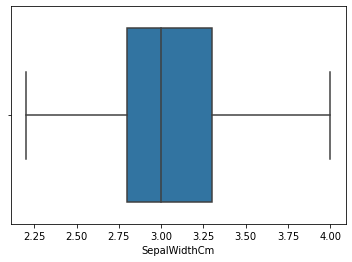

In [11]:
sb.boxplot(x=df_without_outliers['SepalWidthCm'])